<a href="https://colab.research.google.com/github/OmamaRawahi/Data-Privacy/blob/main/Ex_09_26_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Privacy
## In-Class

In [1]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    return np.abs(orig - priv)/orig * 100.0

adult = pd.read_csv('https://github.com/jnear/cs211-data-privacy/raw/master/homework/adult_with_pii.csv')

<ipython-input-1-c4969c0f00bf>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
adult


,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,6/7/1988,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,8/6/1991,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,4/6/2009,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,9/16/1951,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Ardyce Golby,10/29/1961,212-61-8338,41328,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Jean O'Connor,6/28/1952,737-32-2919,94735,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Reuben Skrzynski,8/9/1966,314-48-0219,49628,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Caye Biddle,5/19/1978,647-75-3550,8213,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Question 1

For various values of $b$, write code to print out the percent error of summing the ages in the `adult` dataset,
clipped to each value of $b$.

In [10]:
bs = range(1, 100, 10)
real_sum = adult['Age'].sum()
for b in bs:
    # Clip the ages to the current value of b
    clipped_sum = adult['Age'].clip(lower=0, upper=b).sum()

    Percent_error=((real_sum-clipped_sum)/real_sum)*100
     # Print the result
    print(f"For b = {b}, Clipped Sum = {clipped_sum}, Percent Error = {Percent_error}%")

For b = 1, Clipped Sum = 32561, Percent Error = 97.4080940444511%
For b = 11, Clipped Sum = 358171, Percent Error = 71.48903448896206%
For b = 21, Clipped Sum = 678374, Percent Error = 46.000380495392264%
For b = 31, Clipped Sum = 935798, Percent Error = 25.509031989473492%
For b = 41, Clipped Sum = 1108069, Percent Error = 11.7959939725709%
For b = 51, Clipped Sum = 1201865, Percent Error = 4.329687317165198%
For b = 61, Clipped Sum = 1241700, Percent Error = 1.1587597123836921%
For b = 71, Clipped Sum = 1253315, Percent Error = 0.2341877497996031%
For b = 81, Clipped Sum = 1255772, Percent Error = 0.03860675005194001%
For b = 91, Clipped Sum = 1256257, Percent Error = 0.0%


What value of $b$ is the best?

YOUR ANSWER HERE

## Question 2

For various values of $b$, print the result of a *differentially private* sum of ages, clipped to each value of $b$. Use $\epsilon = 0.1$.

In [18]:
bs = range(1, 100, 10)
real_sum = adult['Age'].sum()
for b in bs:
    # Clip the ages to the current value of b
    clipped_sum = adult['Age'].clip(lower=0, upper=b).sum()

    noise_add=clipped_sum+np.random.laplace(loc=0, scale=1/0.1)
     # Print the result
    print(f"For b = {b}, Clipped Sum = {clipped_sum}, differentially private sum = ",noise_add)

For b = 1, Clipped Sum = 32561, differentially private sum =  32568.50577921981
For b = 11, Clipped Sum = 358171, differentially private sum =  358181.9451314483
For b = 21, Clipped Sum = 678374, differentially private sum =  678379.3176448656
For b = 31, Clipped Sum = 935798, differentially private sum =  935788.6217624572
For b = 41, Clipped Sum = 1108069, differentially private sum =  1108056.166257963
For b = 51, Clipped Sum = 1201865, differentially private sum =  1201865.3782098033
For b = 61, Clipped Sum = 1241700, differentially private sum =  1241702.9232992597
For b = 71, Clipped Sum = 1253315, differentially private sum =  1253316.3727774047
For b = 81, Clipped Sum = 1255772, differentially private sum =  1255772.190136209
For b = 91, Clipped Sum = 1256257, differentially private sum =  1256255.7797449704


Which value of $b$ is the best now? Does it differ?

YOUR ANSWER HERE

## Question 3

Write an algorithm to *automatically pick the clipping parameter* for the age column. Your algorithm should satisfy differential privacy.

In [65]:
def pick_b(epsilon):

    clipped_sum = adult['Age'].clip(lower=0, upper=100).value_counts()

    return clipped_sum + np.random.laplace(loc=0,scale=1/epsilon)

pick_b(1.0)

36    898.453217
31    888.453217
34    886.453217
23    877.453217
35    876.453217
         ...    
83      6.453217
88      3.453217
85      3.453217
86      1.453217
87      1.453217
Name: Age, Length: 73, dtype: float64

In [66]:
# TEST CASE for question 3

many_trials = np.mean([pick_b(1.0) for _ in range(100)])
assert many_trials > 70
assert many_trials < 500

## Question 4

What is the privacy cost of your algorithm, and why?

YOUR ANSWER HERE

## Question 5

Write code to generate a *histogram* of education numbers in the `adult` dataset.

In [41]:
def education_hist():
    # Generate a histogram of education numbers
    education_counts = adult['Education'].value_counts()

    # Convert the result to a dictionary for easy access
    education_dict = education_counts.to_dict()

    return education_dict

In [42]:
# TEST CASE for question 5
h = education_hist()
assert h['HS-grad'] == 10501
assert h['12th'] == 433
assert h['Doctorate'] == 413

## Question 6

Write code to release a *differentially private histogram* of education numbers.

In [45]:
def dp_education_hist(epsilon):
    return adult['Education'].value_counts()+ np.random.laplace(loc=0,scale=1/epsilon)

dp_education_hist(1.0)

HS-grad         10498.657176
Some-college     7288.657176
Bachelors        5352.657176
Masters          1720.657176
Assoc-voc        1379.657176
11th             1172.657176
Assoc-acdm       1064.657176
10th              930.657176
7th-8th           643.657176
Prof-school       573.657176
9th               511.657176
12th              430.657176
Doctorate         410.657176
5th-6th           330.657176
1st-4th           165.657176
Preschool          48.657176
Name: Education, dtype: float64

In [46]:
# TEST CASE for question 6
h = dp_education_hist(1.0)
assert abs(h['HS-grad'] - 10501) < 100
assert abs(h['Doctorate'] - 413) < 100

## Question 7

What is the total privacy cost of `dp_education_hist`, and why?

YOUR ANSWER HERE

## Question 8

Write code to generate a differentially private *contingency table* for the Education and Sex columns of the `adult` dataset.

In [52]:
def dp_crosstab_education_sex(epsilon):
     return pd.crosstab(adult['Education'], adult['Sex'])+np.random.laplace(loc=0,scale=1/epsilon)
dp_crosstab_education_sex(1.0)

Sex,Female,Male
Education,,
10th,295.937866,638.937866
11th,432.937866,743.937866
12th,144.937866,289.937866
1st-4th,46.937866,122.937866
5th-6th,84.937866,249.937866
7th-8th,160.937866,486.937866
9th,144.937866,370.937866
Assoc-acdm,421.937866,646.937866
Assoc-voc,500.937866,882.937866


In [53]:
# TEST CASE for question 8
ct = dp_crosstab_education_sex(1.0)
assert abs(ct['Female']['10th'] - 295) < 100
assert abs(ct['Male']['10th'] - 638) < 100
assert abs(ct['Female']['Bachelors'] - 1619) < 100

assert abs(ct['Female']['10th'] - 295) > 0
assert abs(ct['Male']['10th'] - 638) > 0
assert abs(ct['Female']['Bachelors'] - 1619) > 0

## Question 9

Does parallel composition apply for the contingency table in question 1? Why or why not?

YOUR ANSWER HERE

## Question 10

Does the number of columns used in constructing the contingency table matter for privacy cost? Does it matter for accuracy?

YOUR ANSWER HERE

## Question 11

Implement the Gaussian mechanism for $(\epsilon, \delta)$-differential privacy.

In [54]:
def gaussian_mech(count, sensitivity, epsilon, delta):
    # Calculate the scale parameter for Laplace noise
    beta = sensitivity / epsilon

    # Generate Laplace noise
    laplace_noise = np.random.laplace(scale=beta)

    # Calculate the standard deviation of Gaussian noise
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * beta

    # Generate Gaussian noise
    gaussian_noise = np.random.normal(loc=0, scale=sigma)

    # Add Laplace and Gaussian noise to the count
    noisy_count = count + laplace_noise + gaussian_noise

    return noisy_count

In [55]:
# TEST CASE

results = [gaussian_mech(len(adult[adult['Age'] > 50]), 1, 1.0, 10e-5) for _ in range(100)]
errors = [pct_error(len(adult[adult['Age'] > 50]), r) for r in results]
print('mean error:', np.mean(errors))

assert np.mean(errors) > 0
assert np.mean(errors) < 2

mean error: 0.05886428876069715


## Question 12

How do the Laplace and Gaussian mechanisms compare in terms of relative error on the query "how many individuals are over 50 years old" with $\epsilon = 1$ and $\delta = 10^{-5}$?

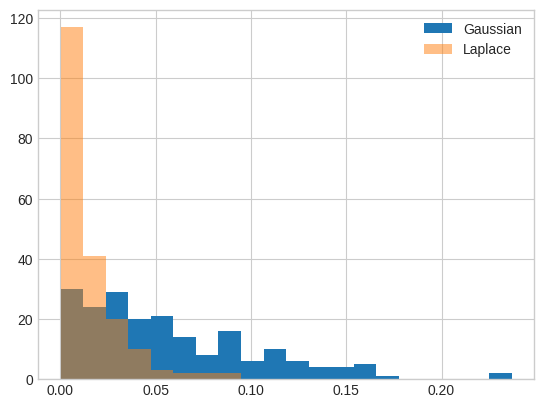

In [56]:
true_answer = len(adult[adult['Age'] > 50])

laplace_answers = [laplace_mech(true_answer, 1, 1) for _ in range(200)]
gaussian_answers = [gaussian_mech(true_answer, 1, 1, 10e-5) for _ in range(200)]

laplace_error = [pct_error(true_answer, a) for a in laplace_answers]
gaussian_error = [pct_error(true_answer, a) for a in gaussian_answers]

_, bins, _ = plt.hist(gaussian_error, bins=20, label='Gaussian')
plt.hist(laplace_error, bins=bins, label='Laplace', alpha=0.5)
plt.legend();

YOUR ANSWER HERE

## Not a Question - Just for reference

[Reference](https://uvm-plaid.github.io/programming-dp/notebooks/ch6.html#the-gaussian-mechanism)

e^epsilon = 2.718281828459045


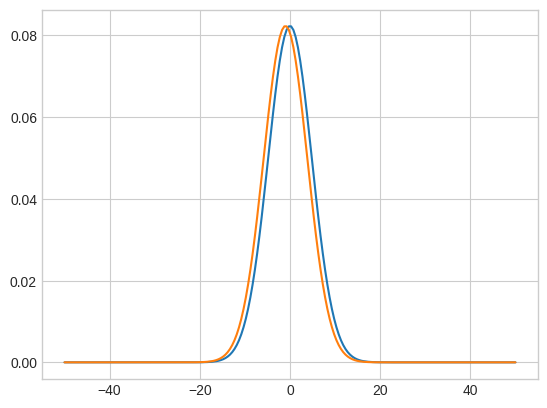

In [57]:
epsilon = 1
sensitivity = 1
delta = 1e-5
sigma_squared = 2 * sensitivity**2 * np.log(1.25 / delta) / (epsilon**2)
sigma = np.sqrt(sigma_squared)

def gauss_pdf(x):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(1/2)*(x/sigma)**2)

xs = np.linspace(-50, 50, 200)
ys1 = [gauss_pdf(x) for x in xs]
ys2 = [gauss_pdf(x+1) for x in xs]

plt.plot(xs,ys1)
plt.plot(xs,ys2)

# ratio < e^epsilon should hold
print('e^epsilon =', np.exp(epsilon))
ratios = [(x, y1 / y2) for x, y1, y2 in zip(xs, ys1, ys2)]
#ratios

e^epsilon = 2.718281828459045


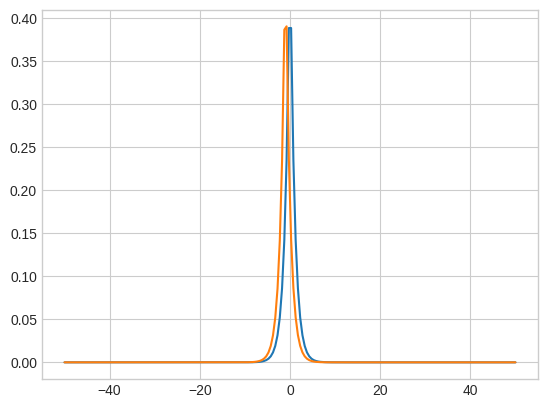

In [58]:
def laplace_pdf(x):
    return (1/2)*epsilon * np.exp(-np.abs(x)*epsilon)

xs = np.linspace(-50, 50, 200)
ys1 = [laplace_pdf(x) for x in xs]
ys2 = [laplace_pdf(x+1) for x in xs]

plt.plot(xs,ys1)
plt.plot(xs,ys2)

# ratio < e^epsilon should hold
print('e^epsilon =', np.exp(epsilon))
ratios = [(x, y1 / y2) for x, y1, y2 in zip(xs, ys1, ys2)]
#ratios